<div style="text-align: center">
   
# **📊 Data Science Jobs Analysis 💼** 
    
</div>


# <u>**Problem Statement**:
<img src="image.jpg" alt="Description" style="width: 70%; height: auto;" />

**The objective of this project is to analyze job listings data scraped from Naukri.com to gain insights into the data science job market 📈. The dataset includes various features such as job titles, companies, required experience, locations, salary ranges 💼, and key skills demanded by employers in the data science field. The primary goal is to understand the key trends 🔍 in job requirements, company ratings, and skill sets to help aspiring data scientists 🧑‍💻 make informed decisions about career growth, skill development, and job opportunities. This project will involve comprehensive data cleaning 🧹, exploratory data analysis 📊, and visualization 🖼️ to uncover valuable insights into the current job market landscape.**


<div style="text-align: center">
   
# **SPRINT 1 - Web Scraping** 
    
</div>

## **Description**


In Sprint 1, we focused on web scraping job listings from Naukri.com to gather valuable insights into the data science job market. We utilized **Selenium**, a powerful web automation tool, to create a script that interacts with web elements dynamically and extracts relevant job data.

The coding procedure involves the following key steps:

1. **Setup**: We initialized the Selenium WebDriver (e.g., ChromeDriver) to launch the web browser and navigate to the Naukri.com job listings pages.

2. **Looping Through Pages**: A loop was implemented to iterate through multiple job listing pages, enabling us to scrape data across different listings efficiently.

3. **Locating Elements**: Using various XPath selectors, we identified and extracted key data points:
   - **Job Title and Company**: Extracted using the XPath `'.//div[@class="row1"]'`.
   - **Job Posting Date**: Retrieved using `'.//span[@class="job-post-day"]'`.
   - **Job Details**: Located through `'.//div[@class="job-details"]'`, which includes experience requirements and location.

4. **Storing Data**: Each extracted element was stored in corresponding lists (e.g., `titles`, `companies`, `days`, etc.) for further analysis.

This foundational data collection process will support our analysis in later sprints, enabling us to uncover valuable insights into the data science job market.

In [1]:
#importing all the required libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import time

In [58]:
#Lists to store the extracted data
title=[]
company=[]
ratings=[]
reviews=[]
years=[]
location=[]
days=[]
salary=[]
skills=[]
como=[]
key_skills=[]

#initializing chrome browser
driver=webdriver.Chrome()

#iterating through the pages
for j in range(1,111):
    url = f"https://www.naukri.com/data-science-jobs-{j}"
    driver.get(url)
    time.sleep(5)
    for i in driver.find_elements(By.XPATH , './/div[@class="cust-job-tuple layout-wrapper lay-2 sjw__tuple "]'):
        
        #Extracting job title
        t = i.find_element(By.XPATH , './/div[@class=" row1"]')
        if t.text is None:
            title.append(np.nan)
        else:
            title.append(t.text)
            
        #Extracting the name of the company
        c = i.find_element(By.XPATH , './/div[@class=" row2"]')
        if re.findall("(^\w+.*)\\n\d\.",c.text):
            company.append(''.join(re.findall("(^\w+.*)\\n\d\.",c.text)))
        else:
            company.append(np.nan)
            
        #Extracting the ratings of the company 
        if re.findall("\d\.\d",c.text):
            ratings.append(re.findall("\d\.\d",c.text)[0])
        else:
            ratings.append(np.nan)
            
        #Extracting the reviews
        if re.findall("\d+(?= Reviews)",c.text):
            reviews.append(re.findall("\d+(?= Reviews)",c.text)[0])
        else:
            reviews.append(np.nan)
            
        #Extracting years of experience
        y = i.find_element(By.XPATH , './/div[@class="job-details "]')
        if re.findall("\d\-\d.",y.text):
            years.append(re.findall("\d\-\d.",y.text)[0])
        else:
            years.append(np.nan)
            
        #Extracting the location of the job.
        l = i.find_element(By.XPATH , './/div[@class="job-details "]')
        if re.findall('\\n\w.*\\n(.*)',l.text):
            location.append(''.join(re.findall('\\n\w.*\\n(.*)',l.text)))
        else:
            location.append(np.nan)
            
        #Extracting the number of days ago, the job was posted
        d = i.find_element(By.XPATH , './/span[@class="job-post-day "]')
        if re.findall("\d",y.text):
            days.append(re.findall("\d",y.text)[0])
        elif "Just Now" in y.text:
            years.append(1)
            continue
        else:
            days.append(np.nan)
            
        #Extracting the salary if disclosed
        s = i.find_element(By.XPATH , './/div[@class="job-details "]')
        if re.findall("\\n(.*)\\n",s.text):
            salary.append(''.join(re.findall("\\n(.*)\\n",s.text)))
        else:
            salary.append(np.nan)
            
        #Extracting the skills and then extracting key skills from the skills
        try:
            sk = i.find_element(By.XPATH, './/ul[@class="tags-gt "]')
            skills.append(sk.text) 
        except NoSuchElementException:
            skills.append(np.nan)  
        try:
            sk1=i.find_element(By.XPATH, './/ul[@class="tags-gt "]')
            skill=re.findall(r"""(?i)(data analytics|machine learning|python|matplotlib|seaborn|pandas|excel|sql|numpy|
                  natural language processing|nlp|deep learning|dl|ml|visualization|java|C\+\+|
                  image processing|sas|bet|statistical modelling|data science|data analysis|data mining|
                  data analyst|statistical analysis|data engineer|statistics|big data|predictive modelling|
                  data security|time series analysis|data collection|data engineering|gen ai|cloud services|
                  aws|automation|azure|nosql|mysql|llm|tensorflow|pyspark|ai|artificial intelligence|
                  sap|data processing|power bi|powerbi|business analysis|data management|neural networks)""", sk.text)
            
            key_skills.append(','.join(skill))
        except NoSuchElementException:
            key_skills.append(np.nan)

In [ ]:
#Creating the data frame
d0=pd.DataFrame({"title":title,
               "company":company,
                "ratings":ratings,
                "reviews":reviews,
                "years":years,
                "location":location,
                "days":days,
                "salary":salary,
                "skills":skills,
                "key_skills":key_skills})

In [ ]:
#converting to csv
d0.to_csv('Nakuri.csv', index=False)

In [157]:
#reading the csv file
df=pd.read_csv('Nakuri.csv')

In [158]:
#dropping unnecessary columns
df.drop('skills',axis=1,inplace=True)

##  <u>**Column Description**</u>

- **title**: The job title or position being advertised (e.g., Data Scientist, Data Analyst, etc.).
- **company**: The name of the company posting the job listing.
- **ratings**: The rating of the company (if available) as given by employees or users.
- **reviews**: The number of reviews left for the company.
- **years**: The required range of years of experience for the job (e.g., 2-5 years).
- **location**: The geographical location of the job (e.g., city or region).
- **days**: The number of days ago the job was posted.
- **salary**: The salary offered for the job (if provided in the listing).
- **key_skills**: Specific technical skills extracted from the job description (e.g., Python, SQL, Machine Learning, etc.).

In [159]:
df.head()

,title,company,ratings,reviews,years,location,days,salary,key_skills
0,R&D- Data Science and Analytics Lead,Pepsi Foods,4.1,2308.0,2-5,Hyderabad,2.0,Not disclosed,"Machine learning,big data"
1,Specialist- Data Science & Analytics,Carrier,3.8,419.0,2-5,Bengaluru,2.0,Not disclosed,"ai,data science,Neural networks,Artificial Int..."
2,Data Science Analytics Analyst,Accenture,4.0,49777.0,3-5,Bengaluru,3.0,Not disclosed,"data mining,machine learning,excel,python,data..."
3,Data Science & Analytics Engagement Lead,CANPACK,4.3,236.0,0-15,Pune,1.0,Not disclosed,"sql,data science,data mining,power bi,machine ..."
4,"Assoc Manager, Data Science Analytics",NaN,NaN,NaN,3-6,Bengaluru,3.0,Not disclosed,"excel,python,data mining"


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       2171 non-null   object 
 1   company     1711 non-null   object 
 2   ratings     1711 non-null   float64
 3   reviews     1711 non-null   float64
 4   years       2168 non-null   object 
 5   location    2171 non-null   object 
 6   days        2171 non-null   float64
 7   salary      2171 non-null   object 
 8   key_skills  2139 non-null   object 
dtypes: float64(3), object(6)
memory usage: 152.8+ KB


<div style="text-align: center">
   
# **SPRINT 2 - Data Wrangling** 
    
</div>

### Sprint 2: Data Wrangling

In Sprint 2, we focused on data wrangling to prepare the scraped job listings dataset for analysis. This phase is crucial as it transforms raw data into a clean, structured format, enabling us to derive meaningful insights.

The data wrangling procedure involves several key steps:

1. **Data Cleaning**: We began by addressing missing values, duplicates, and inconsistencies within the dataset. This included removing any job postings that lacked essential information such as job titles or company names.

2. **Data Type Conversion**: We ensured that each column was of the appropriate data type. For example, salary ranges were converted from strings to numerical values, and dates were formatted for easier manipulation.

3. **Feature Engineering**: New features were created to enhance the dataset. For instance, we extracted the minimum and maximum salary from the salary range column and categorized job titles into broader roles (e.g., Data Analyst, Data Scientist).

4. **Text Normalization**: To facilitate analysis, we standardized text fields by converting them to lowercase and removing unnecessary whitespace or special characters, ensuring consistency across the dataset.

5. **Data Transformation**: Finally, we transformed the dataset into a tidy format, organizing it for easy analysis. This included pivoting tables and encoding categorical variables as needed.

By the end of Sprint 2, the dataset was well-prepared, laying a solid foundation for the exploratory data analysis in the subsequent sprint. This comprehensive data wrangling process is essential for ensuring the reliability and accuracy of our findings.

### **Changes made to the data**

- Fixing the salary column .
  1) Filling not disclosed with nan.
  2) converting thousand to lakhs
  3) creating 2 separate columns for staring and ending range of the salary.
  4) Converting data type of minmum and maximum salary.
  5) Dropping the salary column.
- Fixing year column
  1) Creating two columns (min_year, max_year) from the column year.
  2) Converting the data type of the columns.
  3) Swapppin min_YOE and max_YOE where min_YOE>max_YOE.
- There is an empty row in the data frame which should be dropped.
- Changing the data type of days from float to int.
- creating a new column named job_type which will be extracted from location column.
- Fixing location column
  1) Removing unnecessary terms from the column.
  2) Removed the information which is present in brackets as it is not useful.
  3) Bangalore has multiple names like Benagluru , Bangalore Rural, replace it with a single term  i.e, Bangalore.
  4) There are few remote jobs whose job_type is changed to Remote.
- Creating new column named experience_level which is used to catogorize people based on year of experience.
- Creating a new column named experience_category based on experience_level which can later be used for analysis.
- Cleaning company column:
    1) Stripping extra apaces.
    2) Converting all the company names to lower case to resolve the issue of inconsistency.
    3) Standardizing company name by replacing pepi foods with pepsico .
- Removing duplicate columns.


####  <u>**Fixing salary column**

Filling not disclised values with null

In [161]:

df['salary'] = df['salary'].replace('Not disclosed', np.nan)


Removing all the text from the salary solumn so that it willl be easy to extract the minimum and maximu  salary from the range

In [162]:
df['salary'] = df['salary'].str.replace(' Lacs PA','').str.replace(' Cr and above PA','').str.replace('5 Cr PA','')

In [163]:
df['salary'] = df['salary'].str.replace(' PA','')

Converting thousands to lakhs:<br>
Since there are only two values in thousands, we are fixing it manually, if not we can do it with loops

In [164]:
df['salary'] = df['salary'].str.replace('50,000','0.5').str.replace('80,000','0.8')

Extracting minimum salary and maximum salary from the range

In [165]:
def find_min(x):
    if pd.isna(x):
        return np.nan
    else:
        return str(''.join(re.findall('(\d+.*)\-',x)))

In [166]:
df['min_salary']=df['salary'].apply(lambda x: find_min(x))

In [167]:
df[df['salary'].notna()][['salary','min_salary']]

,salary,min_salary
33,10-20,10
46,1-3,1
47,4.5-5.5,4.5
51,18-25,18
70,5-10,5
...,...,...
2072,2.75-5,2.75
2098,22.5-25,22.5
2114,35-40,35
2115,4-8,4


In [168]:
def find_max(x):
    if pd.isna(x):
        return np.nan
    else:
        return str(''.join(re.findall('\-(.*)',x)))

In [169]:
df['max_salary'] = df['salary'].apply(lambda x: find_max(x))

In [170]:
df['max_salary'].unique()

array([nan, '20', '3', '5.5', '25', '10', '22', '22.5', '9', '24', '14',
       '15', '45', '30', '40', '2.', '17', '18', '60', '3.75', '4', '21',
       '5', '35', '4.5', '8', '4.25', '13', '7', '65', '12', '16', '34',
       '17.5', '', '27.5', '32.5', '42.5', '6', '4.75', '1', '11', '9.5',
       '2.5', '70'], dtype=object)

In [171]:
df[df['salary'].notna()][['salary','min_salary','max_salary']]

,salary,min_salary,max_salary
33,10-20,10,20
46,1-3,1,3
47,4.5-5.5,4.5,5.5
51,18-25,18,25
70,5-10,5,10
...,...,...,...
2072,2.75-5,2.75,5
2098,22.5-25,22.5,25
2114,35-40,35,40
2115,4-8,4,8


Converting the datatype of minimum salry are the maximum salry to float from string

In [172]:
df['min_salary'] = df['min_salary'].replace('',np.nan)
df['max_salary'] = df['min_salary'].replace('',np.nan)

In [173]:
df['min_salary'].unique()

array([nan, '10', '1', '4.5', '18', '5', '12', '7', '14', '7.5', '30',
       '20', '25', '8', '15', '35', '2.5', '2', '9', '11', '4', '1.5',
       '3.5', '3', '50', '6', '0', '6.5', '9.5', '13', '27.5', '0.5',
       '3.25', '22.5', '0.8', '5.5', '2.75', '37.5', '1.75', '60'],
      dtype=object)

In [174]:
df[['min_salary','max_salary']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   min_salary  176 non-null    object
 1   max_salary  176 non-null    object
dtypes: object(2)
memory usage: 34.1+ KB


In [175]:
df[['min_salary','max_salary']] = df[['min_salary','max_salary']].astype('float')

In [176]:
df[['min_salary','max_salary']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   min_salary  176 non-null    float64
 1   max_salary  176 non-null    float64
dtypes: float64(2)
memory usage: 34.1 KB


Dropping salary column as it is not required

In [177]:
df=df.drop('salary',axis=1)

In [178]:
df.head()

,title,company,ratings,reviews,years,location,days,key_skills,min_salary,max_salary
0,R&D- Data Science and Analytics Lead,Pepsi Foods,4.1,2308.0,2-5,Hyderabad,2.0,"Machine learning,big data",NaN,NaN
1,Specialist- Data Science & Analytics,Carrier,3.8,419.0,2-5,Bengaluru,2.0,"ai,data science,Neural networks,Artificial Int...",NaN,NaN
2,Data Science Analytics Analyst,Accenture,4.0,49777.0,3-5,Bengaluru,3.0,"data mining,machine learning,excel,python,data...",NaN,NaN
3,Data Science & Analytics Engagement Lead,CANPACK,4.3,236.0,0-15,Pune,1.0,"sql,data science,data mining,power bi,machine ...",NaN,NaN
4,"Assoc Manager, Data Science Analytics",NaN,NaN,NaN,3-6,Bengaluru,3.0,"excel,python,data mining",NaN,NaN


####  <u>**Fixing years column**

In [179]:
df['years'].unique()

array(['2-5 ', '3-5 ', '0-15', '3-6 ', '4-8 ', '9-14', '4-9 ', '8-9 ',
       '3-8 ', '1-4 ', '4-7 ', '2-4 ', '6-11', '7-12', '0-1 ', '1-3 ',
       '0-12', '3-7 ', '4-6 ', '8-13', '5-7 ', '5-10', '5-9 ', '6-9 ',
       '8-10', '6-10', '6-8 ', '0-4 ', '9-12', '7-9 ', '0-11', '4-5 ',
       '8-15', '7-10', '7-8 ', '5-12', '5-6 ', '5-8 ', '1-6 ', '2-18',
       '2-7 ', '5-18', '2-10', '8-12', '1-5 ', '0-2 ', '2-16', '2-20',
       '2-14', '0-20', '0-14', '6-7 ', '2-6 ', nan, '0-8 ', '2-9 ',
       '2-3 ', '2-15', '3-9 ', '2-8 ', '5-24', '0-5 ', '5-30', '3-4 ',
       '7-11', '0-3 ', '6-25', '6-12', '0-6 ', '5-19', '1-2 ', '4-4.',
       '9-11', '5-20', '3-10', '0-13', '5-11', '0-18', '0-16', '2-17',
       '5-17', '1-16', '8-11', '4-15', '8-22', '6-22', '1-10', '5-4 ',
       '0-19', '3-15', '1-18', '4-10', '9-10', '4-18', '1-7 ', '3-20',
       '7-15', '5-3 ', '5-25'], dtype=object)

In [180]:
def find_min_yoe(y):
    if pd.isna(y):
        return np.nan
    else:
        return y[0]

In [181]:
df['min_YOE'] = df['years'].apply(lambda y : find_min_yoe(y))

In [182]:
def find_max_yoe(y):
    if pd.isna(y):
        return np.nan
    else:
        return y[2:].strip()

In [183]:
df['max_YOE'] = df['years'].apply(lambda y : find_max_yoe(y))

Convert the datatype of the two columns that are created

In [184]:
df[['min_YOE','max_YOE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   min_YOE  2168 non-null   object
 1   max_YOE  2168 non-null   object
dtypes: object(2)
memory usage: 34.1+ KB


In [185]:
df[['min_YOE','max_YOE']] = df[['min_YOE','max_YOE']].astype(float)

In [186]:
df[['min_YOE','max_YOE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   min_YOE  2168 non-null   float64
 1   max_YOE  2168 non-null   float64
dtypes: float64(2)
memory usage: 34.1 KB


Swapppin min_YOE and max_YOE where min_YOE>max_YOE.

In [187]:
#This contains boolean mask of rows where df.min_YOE > df.max_YOE
minmax=(df['min_YOE'] > df['max_YOE'])
#swapping the values
df.loc[minmax, ['min_YOE', 'max_YOE']] = df.loc[minmax, ['max_YOE', 'min_YOE']].values

Droppping year column as it is not used for analysis

In [188]:
df = df.drop('years',axis=1)

In [189]:
df.head()

,title,company,ratings,reviews,location,days,key_skills,min_salary,max_salary,min_YOE,max_YOE
0,R&D- Data Science and Analytics Lead,Pepsi Foods,4.1,2308.0,Hyderabad,2.0,"Machine learning,big data",NaN,NaN,2.0,5.0
1,Specialist- Data Science & Analytics,Carrier,3.8,419.0,Bengaluru,2.0,"ai,data science,Neural networks,Artificial Int...",NaN,NaN,2.0,5.0
2,Data Science Analytics Analyst,Accenture,4.0,49777.0,Bengaluru,3.0,"data mining,machine learning,excel,python,data...",NaN,NaN,3.0,5.0
3,Data Science & Analytics Engagement Lead,CANPACK,4.3,236.0,Pune,1.0,"sql,data science,data mining,power bi,machine ...",NaN,NaN,0.0,15.0
4,"Assoc Manager, Data Science Analytics",NaN,NaN,NaN,Bengaluru,3.0,"excel,python,data mining",NaN,NaN,3.0,6.0


####  <u>**Dropping the empty row**

In [190]:
df = df.dropna(how='all')

In [191]:
df.shape

(2171, 11)

####  <u>**Changing the data type of days from float to int.**

In [192]:
df['days'] = df['days'].astype(int)

In [193]:
df['days'].info()

<class 'pandas.core.series.Series'>
Index: 2171 entries, 0 to 2171
Series name: days
Non-Null Count  Dtype
--------------  -----
2171 non-null   int32
dtypes: int32(1)
memory usage: 25.4 KB


In [194]:
df.head()

,title,company,ratings,reviews,location,days,key_skills,min_salary,max_salary,min_YOE,max_YOE
0,R&D- Data Science and Analytics Lead,Pepsi Foods,4.1,2308.0,Hyderabad,2,"Machine learning,big data",NaN,NaN,2.0,5.0
1,Specialist- Data Science & Analytics,Carrier,3.8,419.0,Bengaluru,2,"ai,data science,Neural networks,Artificial Int...",NaN,NaN,2.0,5.0
2,Data Science Analytics Analyst,Accenture,4.0,49777.0,Bengaluru,3,"data mining,machine learning,excel,python,data...",NaN,NaN,3.0,5.0
3,Data Science & Analytics Engagement Lead,CANPACK,4.3,236.0,Pune,1,"sql,data science,data mining,power bi,machine ...",NaN,NaN,0.0,15.0
4,"Assoc Manager, Data Science Analytics",NaN,NaN,NaN,Bengaluru,3,"excel,python,data mining",NaN,NaN,3.0,6.0


#### <u>**Creating job_type column from location column**

In [195]:
def find_type(p):
    if 'Hybrid' in p:
        return 'Hybrid'
    elif 'Remote' in p:
        return 'Remote'
    else:
        return 'On Site'

In [196]:
df['job_type'] = df['location'].apply(lambda p : find_type(p))

#### <u>**Cleaning Location Column**

Removing unnecessary terms from the column

In [197]:
df['location'] = df['location'].str.replace('Hybrid - ','')
df['location'] = df['location'].str.replace(' / NCR','')

Removed the information which is present in brackets as it is not useful

In [198]:
def remove(z):
    return str(re.sub('\(.*\)','',z))
    

In [199]:
df['location'] =  df['location'].apply(lambda z : remove(z))

In [200]:
def remove_(l):
    return str(re.sub('\/.*','',l))

In [201]:
df['location'] =  df['location'].apply(lambda l : remove_(l))

Bangalore has multiple names like Benagluru , Bangalore Rural, replace it with a single term i.e, Bangalore.

In [202]:
df['location'] = df['location'].str.replace('Bengaluru','Bangalore').str.replace('Bangalore Rural, Bangalore','Bangalore')

In [203]:
df['location'] = df['location'].str.replace('Mumbai, Navi Mumbai, Mumbai','Mumbai').str.replace('Mumbai Suburban, Navi Mumbai, Mumbai ','Mumbai')

In [204]:
df['location'] = df['location'].str.replace('Mumbai, Mumbai Suburban','Mumbai').str.replace('Mumbai, Navi Mumbai','Mumbai')

In [205]:
df['location'] = df['location'].str.replace('Bangalore Rural','Bangalore').str.replace('Navi Mumbai','Mumbai')

In [206]:
df['location'] = df['location'].str.replace('New Delhi, Safdarjung Enclave','Delhi').str.replace('New Delhi','Delhi')

In [207]:
df['location'] = df['location'].str.strip()

#### <u>**Creating a new column named experience_level**


In [208]:
df['experience_level']=df['max_YOE']-df['min_YOE']

#### <u>**Creating a new column named experience_category**


In [209]:
def category(explevel):
    if pd.isna(explevel):
        return np.nan
    elif explevel == 0:
        return 'Data Science Intern'
    elif 0 < explevel <= 2:
        return 'Junior Data Scientist'
    elif 2 < explevel <= 5:
        return 'Data Scientist (Mid Level)'
    elif 5 < explevel <= 8:
        return 'Senior Data Scientist'
    elif 7 < explevel <= 10:
        return 'Lead Data Scientist'
    elif explevel > 10:
        return 'Data Science Architect'
    else:
        return 'Unknown'

In [210]:
df['experience_category'] = df['experience_level'].apply(category)

####  <u>**Fixing company column**

Stripping the spaces.

In [213]:
df['company'] = df['company'].str.strip()

Converting all the company names to title case to resolve the issue of inconsistency.

In [214]:
df['company'] = df['company'].str.lower()

Standardizing company name by replacing pepi foods with pepsico .

In [228]:
df.company = df.company.replace({'pepsi foods':'pepsico'})

#### **Removing duplicate columns**

In [215]:
df[df.duplicated()]

,title,company,ratings,reviews,location,days,key_skills,min_salary,max_salary,min_YOE,max_YOE,job_type,experience_level,experience_category
62,Data Science Trainer,NaN,NaN,NaN,Remote,4,"ai,data science,Machine learning,power bi,visu...",NaN,NaN,4.0,5.0,Remote,1.0,Junior Data Scientist
259,"Group Lead, Clinical Data Science",icon plc,4.1,564.0,"Chennai, Bangalore, Thiruvananthapuram",8,ai,NaN,NaN,8.0,13.0,On Site,5.0,Data Scientist (Mid Level)
406,Data Platform Engineer,accenture,4.0,49777.0,Hyderabad,5,"data analytics,machine learning,statistics,pyt...",NaN,NaN,5.0,10.0,On Site,5.0,Data Scientist (Mid Level)
561,Data Platform Engineer,accenture,4.0,49777.0,Bangalore,3,"data analytics,machine learning,machine learni...",NaN,NaN,3.0,5.0,On Site,2.0,Junior Data Scientist
661,Data Scientist,agilite global solutions,4.0,7.0,"Kolkata, Mumbai, Delhi, Hyderabad, Pune, Chenn...",5,"Data analysis,data science,Machine learning",NaN,NaN,5.0,10.0,On Site,5.0,Data Scientist (Mid Level)
775,Data Platform Engineer,accenture,4.0,49777.0,Bangalore,3,"sas,visualization,machine learning,statistics,...",NaN,NaN,3.0,8.0,On Site,5.0,Data Scientist (Mid Level)
976,AI / ML Engineer,accenture,4.0,49777.0,Bangalore,5,"machine learning,deep learning,ml,python",NaN,NaN,5.0,10.0,On Site,5.0,Data Scientist (Mid Level)
979,AI / ML Engineer,accenture,4.0,49777.0,Bangalore,1,"python,artificial intelligence,java,c++",NaN,NaN,2.0,15.0,On Site,13.0,Data Science Architect
981,AI / ML Engineer,accenture,4.0,49777.0,Bangalore,7,"python,machine learning,statistics,neural netw...",NaN,NaN,7.0,12.0,On Site,5.0,Data Scientist (Mid Level)
1006,AI / ML Engineer,accenture,4.0,49777.0,Bangalore,1,"artificial intelligence,deep learning,ml,ml",NaN,NaN,2.0,16.0,On Site,14.0,Data Science Architect


In [216]:
df[df.duplicated()].shape

(31, 14)

In [217]:
df.shape

(2171, 14)

In [218]:
df.drop_duplicates(inplace=True)

In [219]:
df.shape

(2140, 14)

#  <u>**Cleaned DataFrame**

In [220]:
df.head()

,title,company,ratings,reviews,location,days,key_skills,min_salary,max_salary,min_YOE,max_YOE,job_type,experience_level,experience_category
0,R&D- Data Science and Analytics Lead,pepsi foods,4.1,2308.0,Hyderabad,2,"Machine learning,big data",NaN,NaN,2.0,5.0,On Site,3.0,Data Scientist (Mid Level)
1,Specialist- Data Science & Analytics,carrier,3.8,419.0,Bangalore,2,"ai,data science,Neural networks,Artificial Int...",NaN,NaN,2.0,5.0,On Site,3.0,Data Scientist (Mid Level)
2,Data Science Analytics Analyst,accenture,4.0,49777.0,Bangalore,3,"data mining,machine learning,excel,python,data...",NaN,NaN,3.0,5.0,On Site,2.0,Junior Data Scientist
3,Data Science & Analytics Engagement Lead,canpack,4.3,236.0,Pune,1,"sql,data science,data mining,power bi,machine ...",NaN,NaN,0.0,15.0,On Site,15.0,Data Science Architect
4,"Assoc Manager, Data Science Analytics",NaN,NaN,NaN,Bangalore,3,"excel,python,data mining",NaN,NaN,3.0,6.0,On Site,3.0,Data Scientist (Mid Level)


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2140 entries, 0 to 2171
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                2140 non-null   object 
 1   company              1682 non-null   object 
 2   ratings              1682 non-null   float64
 3   reviews              1682 non-null   float64
 4   location             2140 non-null   object 
 5   days                 2140 non-null   int32  
 6   key_skills           2108 non-null   object 
 7   min_salary           176 non-null    float64
 8   max_salary           176 non-null    float64
 9   min_YOE              2137 non-null   float64
 10  max_YOE              2137 non-null   float64
 11  job_type             2140 non-null   object 
 12  experience_level     2137 non-null   float64
 13  experience_category  2137 non-null   object 
dtypes: float64(7), int32(1), object(6)
memory usage: 242.4+ KB


<div style="text-align: center">
   
# **Sprint 3: Exploratory Data Analysis (EDA) 🔍** 
    
</div>



In Sprint 3, we conducted **Exploratory Data Analysis (EDA)** to uncover patterns, trends, and insights from the cleaned job listings dataset. EDA helps in understanding the structure of the data and identifying key relationships between different variables. This process involved a combination of visual and statistical techniques.

Key steps of EDA include:

1. **Summary Statistics**: We calculated essential summary statistics such as mean, median, mode, and standard deviation for numeric variables like salary, experience, and job postings. These metrics helped us understand the central tendencies and spread of the data.

2. **Visualizations**:
   - **Bar Charts**: We used bar charts to compare the distribution of job titles and companies, helping us identify which roles and organizations are leading in the data science market.
   - **Box Plots**: Box plots were employed to explore the salary range for different experience levels, revealing patterns in compensation across job roles.
   - **Heatmaps**: Correlation heatmaps were generated to identify relationships between different features, such as salary and experience.

3. **Categorical Analysis**: We analyzed categorical variables such as job titles, locations, and key skills. Grouping and visualizing these categories provided insights into the most in-demand skills and the geographic distribution of jobs.

4. **Outlier Detection**: We identified outliers in salary and experience, which could indicate specialized roles or misreported data. Handling these outliers is crucial for accurate analysis in future sprints.

By the end of Sprint 3, we had a comprehensive understanding of the dataset, uncovering significant trends and patterns that will guide further in-depth analysis and model building.

In [234]:
df.head()

,title,company,ratings,reviews,location,days,key_skills,min_salary,max_salary,min_YOE,max_YOE,job_type,experience_level,experience_category
0,R&D- Data Science and Analytics Lead,pepsico,4.1,2308.0,Hyderabad,2,"Machine learning,big data",NaN,NaN,2.0,5.0,On Site,3.0,Data Scientist (Mid Level)
1,Specialist- Data Science & Analytics,carrier,3.8,419.0,Bangalore,2,"ai,data science,Neural networks,Artificial Int...",NaN,NaN,2.0,5.0,On Site,3.0,Data Scientist (Mid Level)
2,Data Science Analytics Analyst,accenture,4.0,49777.0,Bangalore,3,"data mining,machine learning,excel,python,data...",NaN,NaN,3.0,5.0,On Site,2.0,Junior Data Scientist
3,Data Science & Analytics Engagement Lead,canpack,4.3,236.0,Pune,1,"sql,data science,data mining,power bi,machine ...",NaN,NaN,0.0,15.0,On Site,15.0,Data Science Architect
4,"Assoc Manager, Data Science Analytics",NaN,NaN,NaN,Bangalore,3,"excel,python,data mining",NaN,NaN,3.0,6.0,On Site,3.0,Data Scientist (Mid Level)


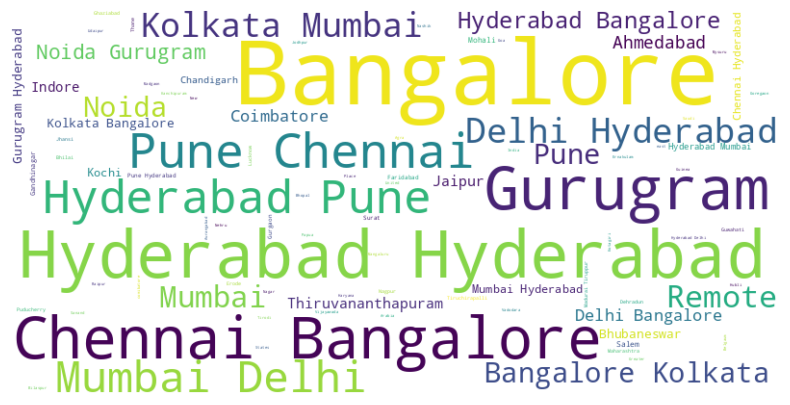

In [243]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and 'company' is the column with the company names

# Replace NaN values with empty strings
x = df['location'].fillna('')

# Join all the company names into one large string
text = ' '.join(x)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()


In [236]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [244]:
df.shape

(2140, 14)

In [ ]:
for i in rang(2140):
    text=''
    